<a href="https://colab.research.google.com/github/Arjun-RY/Projects/blob/task/Assignment4_5_6_7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment 5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

Chirps/Second = [0.20299973]*(Ground Temperature)  + 0.45931464523595267
r-squared:  0.6922946529146998


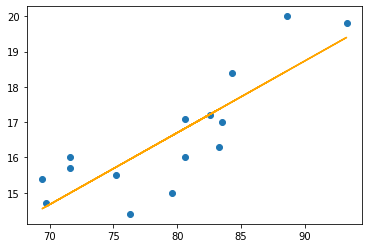

In [ ]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print(f'Chirps/Second = {linreg.coef_}*(Ground Temperature)  + {linreg.intercept_}')
print('r-squared: ', linreg.score(x, y))
plt.scatter(x, y)
plt.plot(x, linreg.predict(x), color='orange')

In [ ]:
Chirps = (0.20299973*95) + 0.45931464523595267
print('When Ground temperature is 95, the chirps/second = ',round(Chirps,1))
groundT= (18-0.45931464523595267)/0.20299973
print('When the chirping rate is 18 , the ground temperature = ',round(groundT,1))

When Ground temperature is 95, the chirps/second =  19.7
When the chirping rate is 18 , the ground temperature =  86.4


# Assignment 6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Body_weight = [0.96649637]*(Brain_weight)  + 91.00439620740687
r-squared:  0.8726620843043331


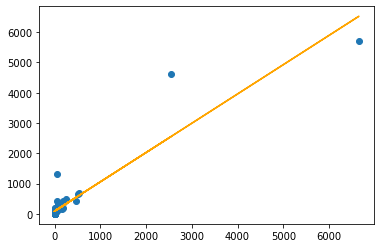

In [ ]:
df = pd.read_fwf("brain_body.txt")
x = df['Brain']
x = x.to_frame()
y = df['Body']
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print(f'Body_weight = {linreg.coef_}*(Brain_weight)  + {linreg.intercept_}')
print('r-squared: ', linreg.score(x, y))
plt.scatter(x, y)
plt.plot(x, linreg.predict(x), color='orange')

Since, the R-squared value (0.87) is greater than 0.8 the equation is good fit for this data

# Assignment 7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [ ]:
import statsmodels.api as sm
df = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     54.13
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           3.86e-18
Time:                        17:35:31   Log-Likelihood:                -474.78
No. Observations:                  52   AIC:                             961.6
Df Residuals:                      46   BIC:                             973.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+04   1081.052     10.555      0.0

P>|t| -  The individual p-values tell us whether or not each predictor variable is statistically significant. We can see that “Rank” and "Year" are statistically significant (p = 0.00) while “SEX” (p = 0.168) is not statistically significant at α = 0.05. Hence, sex is not a factor in salary

# Assignment 8


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

Mileage = [[-0.11861458]]*Price + [22363.54215594]
R-squared = 0.0205


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Mileage
Feature names seen at fit time, yet now missing:
- Price

  warnings.warn(message, FutureWarning)


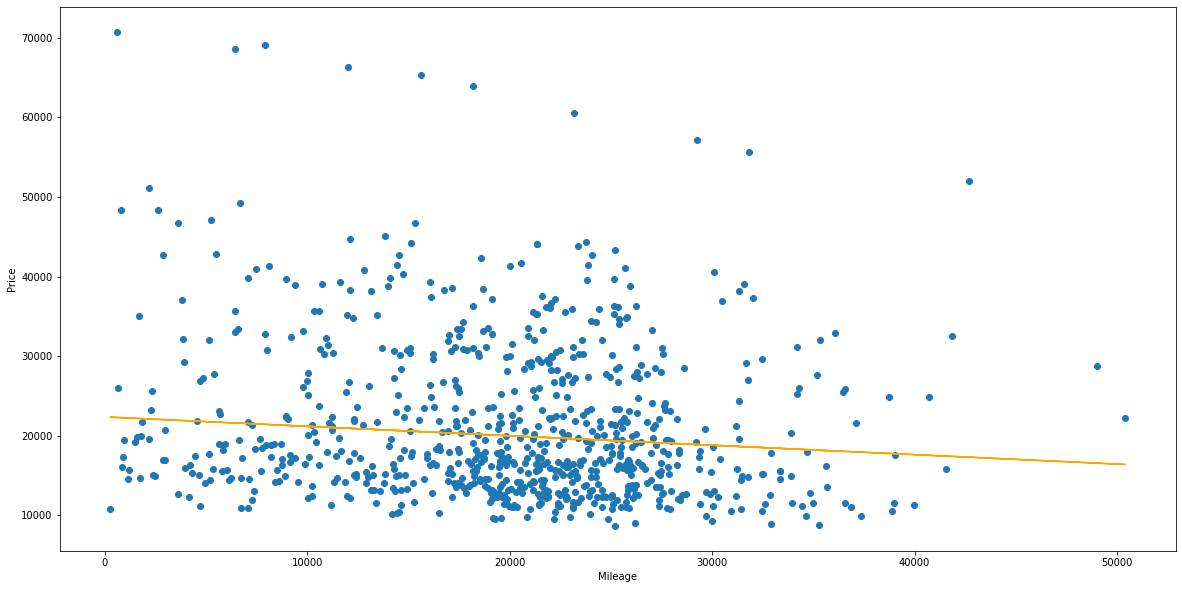


weak correlation


In [ ]:
df = pd.read_csv("car_data.csv")
x = df[["Price"]]
y = df[["Mileage"]]

linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print(f'Mileage = {linreg.coef_}*Price + {linreg.intercept_}')
print('R-squared = {:.4f}'.format(linreg.score(x, y)))
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(y, x) 
plt.plot(y, linreg.predict(y), color='orange')
plt.ylabel("Price")
plt.xlabel('Mileage')
plt.show()
print()
print('strong correlation' if linreg.score(x, y)>0.8 else 'weak correlation')

In [ ]:

import statsmodels.api as sm
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]
x = df[features]
y = df[price]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     91.64
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           8.80e-98
Time:                        18:03:59   Log-Likelihood:                -8298.5
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     796   BIC:                         1.665e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6758.7551   1876.967      3.601      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###R-squared value = 0.446
####Since P>|t| values of mileage, cylinder, doors, cruise, sound and leather are less than 0.05 we can use these factors to predict the price.

# Assignment 4


## Need to be done